In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pickle
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

# Modelo de Regressão (Machine Learning)

In [2]:
# Puxando o CSV com os dados já analisados 
df_cars = pd.read_csv('cars_analisado.csv')

In [3]:
# Dados normais
df_cars.head(4)

,manufacturer,model,year,mileage,cilindrada(engine),transmission,drivetrain,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,driver_reviews_num,price
0,land rover,luxury,2018,33585.0,6.0,automatic,AWD (Tração nas quatro rodas),gasoline,black,black,0.0,1.0,45.0,10.895813
1,nissan,suv,2017,63009.0,3.0,7-speed automatic,RWD (Tração traseira),gasoline,black,white,0.0,0.0,78.0,10.235844
2,toyota,truck,2018,51316.0,5.0,automatic,AWD (Tração nas quatro rodas),gasoline,silver,black,0.0,1.0,160.0,10.757796
3,toyota,sedan,2015,89444.0,3.0,6-speed automatic,FWD (Tração dianteira),gasoline,grey,gray,0.0,1.0,74.0,9.797405


In [4]:
# Sem dados nulos
df_cars.isnull().sum()

manufacturer           0
model                  0
year                   0
mileage                0
cilindrada(engine)     0
transmission           0
drivetrain             0
fuel_type              0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
driver_reviews_num     0
price                  0
dtype: int64

## Tratando Variaveis Categoricas (Análise)

In [5]:
# Vamos criar um dataframe para fazer analises 
df_cars1 = df_cars.copy()

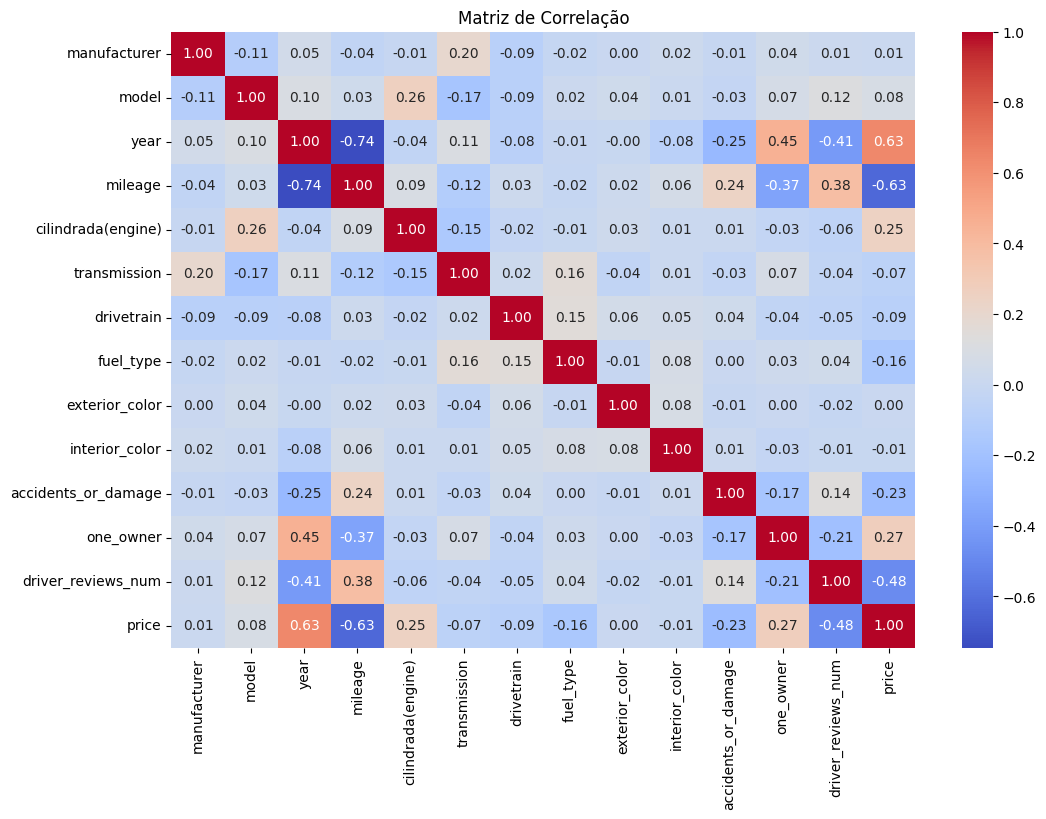

In [6]:
# Selecionar apenas as colunas categóricas
categorical_cols = df_cars1.select_dtypes(include=['object'])

# Listar as colunas categóricas
categorical_features = categorical_cols.columns.tolist()

# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

# Buscando variaveis categoricas
for col in categorical_features:
    df_cars1[col] = label_encoder.fit_transform(df_cars1[col])

# Calculando a matriz de correlação
correlation_matrix = df_cars1.corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


1. Correlação negativa alta entre "Year" e "Mileage" (-0.744810), indicando que carros mais antigos tendem a ter uma quilometragem mais alta.

2. Correlação moderada positiva entre "Year" e "One_owner" (0.454526), sugerindo que carros mais recentes têm maior probabilidade de ter apenas um proprietário anterior.

3. Correlação negativa moderada entre "Mileage" e "One_owner" (-0.374428), indicando que carros com menos quilometragem têm maior probabilidade de ter apenas um proprietário anterior.

4. Correlação negativa moderada entre "One_owner" e "Driver_reviews_num" (-0.209733), sugerindo que carros com apenas um proprietário anterior podem ter menos revisões de motorista.

5. Correlação negativa moderada entre "Driver_reviews_num" e "Year" (-0.414132), indicando que carros mais antigos podem ter menos revisões de motorista.

Essas correlações indicam a presença de multicolinearidade, especialmente entre "Year" e "Mileage".


Resumo das correlações entre as variáveis:
- A variável "year" possui uma forte correlação positiva com o preço do veículo (0.632), indicando que veículos mais recentes tendem a ter preços mais altos.
- A quilometragem ("mileage") tem uma correlação negativa moderada com o preço (-0.629), o que sugere que quanto maior a quilometragem, menor tende a ser o preço do veículo.
- A cilindrada do motor ("cilindrada(engine)") também apresenta uma correlação positiva moderada com o preço (0.248), indicando que veículos com motores maiores tendem a ter preços mais altos.
- Outras variáveis, como "transmission", "fuel_type", "accidents_or_damage" e "one_owner", também mostram correlações significativas com o preço, embora menos fortes.
- Variaveis como 'manufacturer', 'exterior_color' e 'interior_color' tem uma correlação muito fraca ou nula com a variavel 'price', portanto, existe a possibilidade de exclui-las.

In [7]:
# Vamos criar um modelo de regressão simples para analisar as variaveis e ver se vale a pena mantê-las
# Variáveis independentes (features)
X = sm.add_constant(df_cars1.drop(columns=['price']))

# Variável dependente (target)
y = df_cars1['price']

# Criar o modelo de regressão
model = sm.OLS(y, X)

# Ajustar o modelo
result = model.fit()

# Exibir o sumário estatístico
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                 2.219e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:39:17   Log-Likelihood:                -54079.
No. Observations:              179124   AIC:                         1.082e+05
Df Residuals:                  179110   BIC:                         1.083e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -100.3029    

Análise do Modelo de Regressão Linear:

- O modelo de regressão linear apresenta um R-quadrado ajustado de aproximadamente 61.7%, o que sugere que as variáveis incluídas explicam cerca de 61.7% da variabilidade nos preços dos carros.
- Todos os coeficientes das variáveis independentes são estatisticamente significativos, com valores p inferiores a 0.05.
- Observa-se que a variável 'year' (ano), 'mileage' (quilometragem) e 'cilindrada(engine)' (cilindrada do motor) têm coeficientes positivos, o que sugere uma relação positiva com o preço do carro.
- Por outro lado, variáveis como 'manufacturer', 'transmission', 'drivetrain', 'fuel_type', 'exterior_color', 'accidents_or_damage', 'one_owner' e 'driver_reviews_num' têm coeficientes negativos, indicando uma relação negativa com o preço do carro.
- O valor do teste Omnibus sugere que os resíduos não seguem uma distribuição normal, o que pode indicar uma possível violação da suposição de normalidade dos resíduos.
- O número de condição (Cond. No.) é bastante alto, o que pode indicar a presença de multicolinearidade ou outros problemas numéricos no modelo


In [8]:
# Vamos analisar se existe multicolinariedade entre as variaveis para tomar decisões 
# Selecionar apenas as variáveis independentes
X = df_cars1[['year', 'mileage', 'cilindrada(engine)', 'transmission', 'drivetrain', 'fuel_type', 'exterior_color', 'interior_color',
        'accidents_or_damage', 'one_owner', 'driver_reviews_num']]

# Adicionar uma constante se você estiver ajustando um modelo de regressão linear
X = sm.add_constant(X)

# Criar um DataFrame para armazenar os resultados do VIF
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar o VIF
print("Fator de Inflação da Variância (VIF):")
print(vif_data)


Fator de Inflação da Variância (VIF):
               Variável           VIF
0                 const  1.330496e+06
1                  year  2.595287e+00
2               mileage  2.338720e+00
3    cilindrada(engine)  1.041803e+00
4          transmission  1.063473e+00
5            drivetrain  1.048232e+00
6             fuel_type  1.061311e+00
7        exterior_color  1.014016e+00
8        interior_color  1.022961e+00
9   accidents_or_damage  1.081310e+00
10            one_owner  1.273445e+00
11   driver_reviews_num  1.255851e+00


Conclusão sobre o Fator de Inflação da Variância (VIF):

- Um VIF próximo a 1 indica que não há multicolinearidade significativa entre as variáveis.
- Para este modelo, observamos que todas as variáveis têm um VIF abaixo de 5, o que sugere que não há multicolinearidade significativa entre elas.

## Tratamento de Variaveis Categoricas (LabelEncoder)

In [9]:
# Excluindo as variaveis menos importantes para o modelo
# Lista das variáveis menos importantes a serem excluídas
variaveis_excluir = ['exterior_color', 'interior_color']

# Excluir as variáveis menos importantes do DataFrame
df_cars = df_cars.drop(columns=variaveis_excluir)

In [10]:
df_cars.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'cilindrada(engine)',
       'transmission', 'drivetrain', 'fuel_type', 'accidents_or_damage',
       'one_owner', 'driver_reviews_num', 'price'],
      dtype='object')

In [11]:
# Vamos transformar as variaveis em arrays para nosso modelo de regressão

# Criando previsores em array (Variaveis Independentes)
x_cars = df_cars.iloc[:, 0:11].values

# Criando classe array (Target - Variavel Dependente)
y_cars = df_cars.iloc[:, 11].values

In [12]:
# Precisamos substituir todas as strings por valores numericos
x_cars[0]

array(['land rover', 'luxury', 2018, 33585.0, 6.0, 'automatic',
       'AWD (Tração nas quatro rodas)', 'gasoline', 0.0, 1.0, 45.0],
      dtype=object)

In [13]:
# Criando uma variavel para cada variavel categorica que temos
label_encoder_manufacturer = LabelEncoder()
label_encoder_model = LabelEncoder()
label_encoder_transmission = LabelEncoder()
label_encoder_drivetrain = LabelEncoder()
label_encoder_fuel_type = LabelEncoder()

In [14]:
# Substituindo strings em valores numéricos 
x_cars[:,0] = label_encoder_manufacturer.fit_transform(x_cars[:,0])
x_cars[:,1] = label_encoder_model.fit_transform(x_cars[:,1])
x_cars[:,5] = label_encoder_transmission.fit_transform(x_cars[:,5])
x_cars[:,6] = label_encoder_drivetrain.fit_transform(x_cars[:,6])
x_cars[:,7] = label_encoder_fuel_type.fit_transform(x_cars[:,7])

In [15]:
# Alteração bem sucedida
x_cars[0]

array([16, 2, 2018, 33585.0, 6.0, 7, 0, 2, 0.0, 1.0, 45.0], dtype=object)

## Tratamento de Dados Categóricos (OneEncoder)

In [16]:
# Definindo um transformador que aplica a codificação one-hot às colunas especificadas e passa as outras colunas inalteradas
onehotencoder_cars = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0, 1, 5, 6, 7])], remainder= 'passthrough')

In [17]:
# Aplicando a OneEncoder nas variaveis categoricas independentes 
x_cars = onehotencoder_cars.fit_transform(x_cars).toarray()

In [18]:
# Agora temos mais colunas
x_cars.shape

(179124, 64)

## Escanolamento dos Atributos

In [19]:
# Criando um objeto
scaler_cars = StandardScaler()

# Transformando meus atributos
x_cars = scaler_cars.fit_transform(x_cars)

In [20]:
# Aplicação bem sucedida
x_cars[0]

array([-0.10403635, -0.157503  , -0.22648597, -0.13914067, -0.15408184,
       -0.27663075, -0.12879833, -0.17982668, -0.33896633, -0.20194861,
       -0.226663  , -0.17549638, -0.13106425, -0.06553421, -0.24242808,
       -0.22583138,  7.74524138, -0.16438485, -0.11899623, -0.14388161,
       -0.23636684, -0.08961319, -0.26408689, -0.1215519 , -0.16821378,
       -0.18452102, -0.09124469, -0.28760965, -0.18450484, -0.11736924,
       -0.13976475, -0.12608387,  3.13117717, -0.17761458, -0.6188047 ,
       -0.88231981, -0.31441942, -0.19730688, -0.25216457, -0.07831813,
       -0.15002716, -0.52565383, -0.22573579, -0.51195149, -0.30810734,
        2.40878877, -0.42742922, -0.15698106, -0.16729915,  0.95668835,
       -0.69727007, -0.17967774, -0.36833795, -0.1955441 , -0.15366362,
        0.42722823, -0.26021946, -0.17896465, -0.23285352, -0.49190894,
        3.84755906, -0.52578358,  0.81869583, -0.39032482])

## Divisão Treinamento e Teste

In [21]:
# Divisão do df_cars
# Separando a variável alvo das variáveis independentes
y_original = df_cars['price']
x_original = df_cars.drop(columns=['price'])

# Dividindo os dados em conjunto de treinamento e teste (70% treinamento, 30% teste)
x_original_train, x_original_test, y_original_train, y_original_test = train_test_split(x_original, y_original, test_size=0.3, random_state=42)
 
print('X_original_train', x_original_train.shape) 
print('X_original_teste', x_original_test.shape)
print('Y_original_train', y_original_train.shape)
print('Y_original_teste', y_original_test.shape)

X_original_train (125386, 11)
X_original_teste (53738, 11)
Y_original_train (125386,)
Y_original_teste (53738,)


In [22]:
# Divisão do x_cars e y_cars
# Dividindo os dados em conjuntos de treinamento e teste
x_cars_train, x_cars_test, y_cars_train, y_cars_test = train_test_split(x_cars, y_cars, test_size=0.3, random_state=42)

print('X_train', x_cars_train.shape) 
print('X_teste', x_cars_test.shape)
print('Y_train', y_cars_train.shape)
print('Y_teste', y_cars_test.shape)

X_train (125386, 64)
X_teste (53738, 64)
Y_train (125386,)
Y_teste (53738,)


## LinearRegression

Motivo pelo qual decidi fazer esse modelo
- Motivo 1: Um modelo de regressão mais simples, precisava entender como funciona
- Motivo 2: Regresão Linear Múltipla exige menos para o carregamento
- Motivo 3: Podemos comparar os resultados e analisar como parametros de outros modelos

In [23]:
# Inicializando o modelo de regressão linear
regressor = LinearRegression()

# Treinando o modelo com os dados de treinamento
regressor.fit(x_cars_train, y_cars_train)

# Fazendo previsões usando os dados de treinamento
y_pred_train = regressor.predict(x_cars_train)

# Calculando o erro quadrático médio (MSE) nos dados de treinamento
mse_train = mean_squared_error(y_cars_train, y_pred_train)

# Calculando o coeficiente de determinação (R^2) nos dados de treinamento
r2_train = r2_score(y_cars_train, y_pred_train)

# Fazendo previsões usando os dados de teste
y_pred_test = regressor.predict(x_cars_test)

# Calculando o erro quadrático médio (MSE) nos dados de teste
mse_test = mean_squared_error(y_cars_test, y_pred_test)

# Calculando o coeficiente de determinação (R^2) nos dados de teste
r2_test = r2_score(y_cars_test, y_pred_test)


print("Resultados do Treinamento:")
print("Erro Quadrático Médio (MSE) - Treinamento:", mse_train)
print("Coeficiente de Determinação (R^2) - Treinamento:", r2_train) 

print("\nResultados do Teste:")
print("Erro Quadrático Médio (MSE) - Teste:", mse_test)
print("Coeficiente de Determinação (R^2) - Teste:", r2_test) 

Resultados do Treinamento:
Erro Quadrático Médio (MSE) - Treinamento: 0.060353724845280586
Coeficiente de Determinação (R^2) - Treinamento: 0.7832084226704034

Resultados do Teste:
Erro Quadrático Médio (MSE) - Teste: 0.06249725400445936
Coeficiente de Determinação (R^2) - Teste: 0.7785517145092146


- Houve pouca diferença entre o treinamento e teste com base nas métricas, isso mostra que meu modelo não sofreu sobreajuste
- O MSE obteve um resultado muito próximo a zero, significa que a previsão que o modelo fez está muito próximo da realidade
- O Coeficiente R é de aproximadamente 0.77, ou seja, o modelo de regressão com seus resultados explicam cerca de 77% dos dados contidos na variavel dependente
- Com base nos valores obtidos pelas métricas, a performance do meu modelo foi boa, contudo, sempre há espaço para melhorar
- Motivo de escolher essas métricas:
- Motivo 1: Essas métricas consistem em analisar a realidade dos dados e o quanto elas atingem meus dados
- Motivo 2: Duas métricas que possuem fácil interpretação, entendimento
- Motivo 3: Pesquisei e vi que são métricas comuns que o cientista de dados usa

In [24]:
# Obtendo os coeficientes da regressão linear
coeficientes = regressor.coef_

# Criando um dicionário com os coeficientes e seus respectivos nomes de variáveis
dicionario_coeficientes = dict(zip(x_original_train.columns, coeficientes))

# Ordenando as variáveis pelos coeficientes em termos absolutos (valor absoluto)
variaveis_importantes_regressao = sorted(dicionario_coeficientes.items(), key=lambda x: abs(x[1]), reverse=True)

# Imprimindo as duas variáveis mais importantes
print("As duas variáveis mais importantes são:")
print(variaveis_importantes_regressao[:2])


As duas variáveis mais importantes são:
[('accidents_or_damage', -1217783706.408892), ('transmission', -1029260505.5863256)]


Os coeficientes indicam que a presença de acidentes ou danos e o tipo de transmissão são os fatores mais importantes que afetam o preço dos carros. A multicolinearidade, sugerida pela magnitude dos coeficientes e a possível correlação entre essas variáveis e outras no modelo, pode distorcer as estimativas dos coeficientes e reduzir a confiabilidade das previsões. Por esse motivo, vou tentar uma regressão diferente.

## DecisionTreeRegressor

Motivo por fazer outro modelo de regressão
- Curiosidade em saber como os dados reagiriam a outro modelo de regressão
- O que me levou a curiosidade, foi o receio da multicolineariedade no modelo de regressão linear
- Também a titulo de comparação
- Árvore de decisão é um modelo de regressão robusto que não é influenciado pela multicolineariedade
- Observação: (Informações sobre multicolineariedade e sobre Árvore de Decisão ser um modelo mais robusto foi aprendida com o Chatgpt)

In [25]:
# Inicializando o modelo de árvore de decisão
arvore_decisao = DecisionTreeRegressor()

# Treinando o modelo com os dados de treinamento
arvore_decisao.fit(x_cars_train, y_cars_train)

# Fazendo previsões usando os dados de treinamento
y_pred_train_tree = arvore_decisao.predict(x_cars_train)

# Calculando o erro quadrático médio (MSE) nos dados de treinamento
mse_train_tree = mean_squared_error(y_cars_train, y_pred_train_tree)

# Calculando o coeficiente de determinação (R^2) nos dados de treinamento
r2_train_tree = r2_score(y_cars_train, y_pred_train_tree)

# Fazendo previsões usando os dados de teste
y_pred_test_tree = arvore_decisao.predict(x_cars_test)

# Calculando o erro quadrático médio (MSE) nos dados de teste
mse_test_tree = mean_squared_error(y_cars_test, y_pred_test_tree)

# Calculando o coeficiente de determinação (R^2) nos dados de teste
r2_test_tree = r2_score(y_cars_test, y_pred_test_tree)

print('Resultados da Árvore de Decisão - Treinamento:')
print('Erro Quadrático Médio (MSE):', mse_train_tree)
print('Coeficiente de Determinação (R^2):', r2_train_tree)

print('\nResultados da Árvore de Decisão - Teste:')
print('Erro Quadrático Médio (MSE):', mse_test_tree)
print("Coeficiente de Determinação (R^2):", r2_test_tree)

Resultados da Árvore de Decisão - Treinamento:
Erro Quadrático Médio (MSE): 0.0011059436374594362
Coeficiente de Determinação (R^2): 0.996027432172296

Resultados da Árvore de Decisão - Teste:
Erro Quadrático Médio (MSE): 0.040434028987533184
Coeficiente de Determinação (R^2): 0.856728962937555


- Com base nos resultados da arvore de decisão, observamos o MSE está muito próximo de zero, significa que as previsões do modelo estão muito próximos da realidade dos valores reais, embora no treinamento do modelo em comparação ao teste tenha perdido eficiência, ainda podemos considerar um bom resultado.
- Em relação a outra métrica de coeficiente, também podemos observar um bom resultado, o valor do treinamento foi de 0.99 no treinamento, isso é excelente, sabendo que o modelo é capaz de explicar a maioria da variabilidade presente nos dados de treinamento (99%), no entanto, podemos observar quanto ao teste uma queda significativa, evidenciando um sobreajuste dos meus dados, independentemente das variações obtidas, posso concluir que meu modelo de regressão resultou em uma boa performance, embora, sempre exista espaço para melhorias.

In [26]:
# Obtendo a importância das características
importancias_variaveis = arvore_decisao.feature_importances_

# Criando um dicionário com as variáveis e suas importâncias
dicionario_importancia = dict(zip(x_original_train.columns, importancias_variaveis))

# Ordenando as variáveis pela importância
variaveis_importantes = sorted(dicionario_importancia.items(), key=lambda x: x[1], reverse=True)

# Imprimindo as duas variáveis mais importantes
print("As duas variáveis mais importantes são:")
print(variaveis_importantes[:2])


As duas variáveis mais importantes são:
[('fuel_type', 0.00529885621540175), ('transmission', 0.005177992469547118)]


## Conclusão Final

- As métricas escolhidas foram a MSE(Mean Squared Error) para avaliar a precisão de ambos os modelos, e a métrica R²(Coeficiente de Determinação) para avaliar a variabilidade do modelo, ambas as métricas são de uso comum entre cientistas de dados e são simples de serem usadas.
- As métricas foram feitos tanto do treino como teste, após terminar o trabalho que percebi que não precisava.
- Os modelos de regressão escolhidos foram dois, optei primariamente a Regressão Linear Múltipla por ser um modelo mais simples e mais fácil de fazer, no entanto, algumas análises realizadas me deixaram preocupado com a multicolineariedade, sabia da sugestão de excluir as variaveis que causavam isso, porém, fiz o teste com a exclusão e não deu resultado, observei que havia variaveis significativas para meu modelo, como a coluna Year e Mileage, isso explica um dos motivos de ter feito outro modelo de regressão.
- Usei a Árvore de decisão pela robustez que possui e devido a multicolineariedade, ter feito dois modelos de regressão me ajudou a ter parâmetros para analisar.
- As variaveis mais importantes segundo o modelo de regressão linear são as variaveis 'accidents_or_damage' e 'transmission'.
- As variaveis mais importantes segundo o modelo Árvore de Decisão são as variavies 'trasmission' e 'fuel_type'. Consegui determinar quais eram as duas variaveis mais importantes por buscar o coeficiente de cada variavel em cada modelo.
- Os dois modelos apresentaram bons resultados, sendo melhor entre eles a Árvore de Decisão, no entanto, seria mais eficiente se analisasse a multicolineariedade das variaveis, porém, me faltou tempo.
- Todo o trabalho foi baseado nas videoaulas (não assisti todos as aulas ainda) e com a ajuda do chatgpt para correção dos códigos.